In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('lstm_minimalistic_input.csv')
df

,date,Open,High,Low,Close,Adj Close,Volume,SMA_20,EMA_50,RSI,...,bert_vec_758,bert_vec_759,bert_vec_760,bert_vec_761,bert_vec_762,bert_vec_763,bert_vec_764,bert_vec_765,bert_vec_766,bert_vec_767
0,2020-03-13,0.045745,0.063333,0.049321,0.066033,0.063674,0.918191,0.057580,0.037657,0.387356,...,0.545544,-0.553940,-1.070105,0.525724,0.785139,-1.078844,-0.499284,-0.400016,1.548267,0.102505
1,2020-03-16,0.017237,0.037665,0.033488,0.021978,0.021193,0.790546,0.052062,0.034413,0.247342,...,-0.292653,-1.179898,-0.855864,-0.375883,0.403585,-0.603344,-0.349450,-0.044822,1.192861,-0.292855
2,2020-03-17,0.024146,0.035854,0.031532,0.035099,0.033844,0.794859,0.047652,0.031902,0.306571,...,0.344365,-0.296468,-0.917413,0.069898,0.549268,-0.780546,-0.178432,-0.665418,1.558002,0.150759
3,2020-03-18,0.014528,0.026481,0.029967,0.027473,0.026491,0.731914,0.042520,0.029137,0.283683,...,-0.345684,-1.792219,-0.411793,-0.064347,0.464956,-0.130157,0.380487,-0.782903,-0.080783,0.071862
4,2020-03-19,0.023997,0.029979,0.036679,0.025144,0.024246,0.656935,0.037484,0.026374,0.276493,...,-0.088898,-0.718323,-0.997769,0.355838,0.991445,-0.484337,-0.509619,-0.043376,1.084413,0.063778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,2024-12-24,0.986579,0.990688,0.988556,0.995959,0.995991,0.000000,0.981242,0.986463,0.896374,...,-0.244931,-1.148931,-0.285080,0.113003,-0.065337,-0.188608,0.242954,-0.912056,-0.802476,-0.442516
1205,2024-12-26,1.000000,1.000000,1.000000,1.000000,1.000000,0.010576,0.987634,0.991158,0.908132,...,0.559549,-0.243713,-0.454257,-0.572058,0.389740,-0.894127,0.101684,-0.571348,1.227521,-0.226830
1206,2024-12-27,0.998210,0.993103,0.977650,0.983097,0.983228,0.050522,0.993145,0.994889,0.760946,...,-0.015913,-1.049660,-0.648757,-1.235360,-0.017515,0.045988,-0.253670,-0.772506,-0.768945,0.250895
1207,2024-12-30,0.970373,0.967484,0.966353,0.966392,0.966652,0.032561,0.997111,0.997702,0.637513,...,-0.381994,-0.959807,-0.212318,-0.857934,-0.079345,-0.398600,-0.233491,-0.487082,-0.065015,-0.113206


In [2]:
from sklearn.preprocessing import MinMaxScaler

# Identify columns that start with 'bert_'
bert_columns = [col for col in df.columns if col.startswith('bert_')]



In [3]:
# from sklearn.preprocessing import MinMaxScaler
# # Initialize MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
# # Initialize MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))

# # Apply scaling only to BERT columns
# df[bert_columns] = scaler.fit_transform(df[bert_columns])

# # Print first few rows to verify
# print(df.head())


## checking if all the columns are scaled from 0 to 1

In [4]:
# Check min and max values for each bert_ column

for col in df.columns:
    if col != 'date':
        min_val = df[col].min()
        max_val = df[col].max()
        print(f"Column: {col} → Min: {min_val:.4f}, Max: {max_val:.4f}")

Column: Open → Min: 0.0000, Max: 1.0000
Column: High → Min: 0.0000, Max: 1.0000
Column: Low → Min: 0.0000, Max: 1.0000
Column: Close → Min: 0.0000, Max: 1.0000
Column: Adj Close → Min: 0.0000, Max: 1.0000
Column: Volume → Min: 0.0000, Max: 1.0000
Column: SMA_20 → Min: 0.0000, Max: 1.0000
Column: EMA_50 → Min: 0.0000, Max: 1.0000
Column: RSI → Min: 0.0000, Max: 1.0000
Column: Bollinger_High → Min: 0.0000, Max: 1.0000
Column: Bollinger_Low → Min: 0.0000, Max: 1.0000
Column: MACD → Min: 0.0000, Max: 1.0000
Column: sentiment → Min: 0.0000, Max: 2.0000
Column: bert_vec_0 → Min: -1.4570, Max: 0.9491
Column: bert_vec_1 → Min: -1.0756, Max: 1.5442
Column: bert_vec_2 → Min: -1.8299, Max: 2.7375
Column: bert_vec_3 → Min: -0.8272, Max: 0.8853
Column: bert_vec_4 → Min: -1.1402, Max: 1.6064
Column: bert_vec_5 → Min: -1.8005, Max: 0.8868
Column: bert_vec_6 → Min: -1.4344, Max: 1.4539
Column: bert_vec_7 → Min: -0.9570, Max: 1.7369
Column: bert_vec_8 → Min: -1.2210, Max: 1.4230
Column: bert_vec_9 → Mi

## Spliting the data and applying sequence

In [5]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.weekday  # 0 = Monday, 6 = Sunday
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)  # 1 for Sat/Sun, 0 otherwise
df = df.drop(columns=['date'])
df.dtypes

Open           float64
High           float64
Low            float64
Close          float64
Adj Close      float64
                ...   
year             int32
month            int32
day              int32
day_of_week      int32
is_weekend       int32
Length: 786, dtype: object

## Training phase

In [6]:
# Identify object-type columns
object_columns = df.select_dtypes(include=['object']).columns
print("Columns with object dtype:", object_columns.tolist())
df.isnull().sum()

Columns with object dtype: []


Open           0
High           0
Low            0
Close          0
Adj Close      0
              ..
year           0
month          0
day            0
day_of_week    0
is_weekend     0
Length: 786, dtype: int64

In [7]:
import joblib
# Load the saved scaler
scaler = joblib.load("scaler.pkl")

print("✅ Scaler loaded successfully!")

# List of features already scaled
old_features = list(scaler.feature_names_in_)  # Extract previous features

new_scaler = MinMaxScaler(feature_range=(0, 1))
new_scaler.fit(df)  # Fit with both old and new features

# Save the updated scaler
joblib.dump(new_scaler, "scaler_updated.pkl")

print("✅ Scaler has been updated and saved successfully!")


✅ Scaler loaded successfully!
✅ Scaler has been updated and saved successfully!


In [8]:
# Convert DataFrame to numpy array
data_values = df.values

# Define time step (e.g., use last 60 days of data)
time_steps = 60

# Function to create sequences
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps, 3])  # Assuming 'Close' price is at index 3
    return np.array(X), np.array(y)

# Create sequences for LSTM
X, y = create_sequences(data_values, time_steps)

# Train-test split (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")


Train Shape: (919, 60, 786), Test Shape: (230, 60, 786)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0437 - val_loss: 0.1093
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0165 - val_loss: 0.0990
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0155 - val_loss: 0.0779
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0163 - val_loss: 0.1245
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0167 - val_loss: 0.0966
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0168 - val_loss: 0.1169
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0154 - val_loss: 0.1323
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0175 - val_loss: 0.1271
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0162 - val_loss: 0.0897
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0149 - val_loss: 0.1156
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0135 - val_loss: 0.0715
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0

In [11]:
features = list(new_scaler.feature_names_in_)
features

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'SMA_20',
 'EMA_50',
 'RSI',
 'Bollinger_High',
 'Bollinger_Low',
 'MACD',
 'sentiment',
 'bert_vec_0',
 'bert_vec_1',
 'bert_vec_2',
 'bert_vec_3',
 'bert_vec_4',
 'bert_vec_5',
 'bert_vec_6',
 'bert_vec_7',
 'bert_vec_8',
 'bert_vec_9',
 'bert_vec_10',
 'bert_vec_11',
 'bert_vec_12',
 'bert_vec_13',
 'bert_vec_14',
 'bert_vec_15',
 'bert_vec_16',
 'bert_vec_17',
 'bert_vec_18',
 'bert_vec_19',
 'bert_vec_20',
 'bert_vec_21',
 'bert_vec_22',
 'bert_vec_23',
 'bert_vec_24',
 'bert_vec_25',
 'bert_vec_26',
 'bert_vec_27',
 'bert_vec_28',
 'bert_vec_29',
 'bert_vec_30',
 'bert_vec_31',
 'bert_vec_32',
 'bert_vec_33',
 'bert_vec_34',
 'bert_vec_35',
 'bert_vec_36',
 'bert_vec_37',
 'bert_vec_38',
 'bert_vec_39',
 'bert_vec_40',
 'bert_vec_41',
 'bert_vec_42',
 'bert_vec_43',
 'bert_vec_44',
 'bert_vec_45',
 'bert_vec_46',
 'bert_vec_47',
 'bert_vec_48',
 'bert_vec_49',
 'bert_vec_50',
 'bert_vec_51',
 'bert_vec_52',
 'bert_vec_

In [14]:
num_features = df.shape[1]  # Total number of features in df_scaled
print("Total Features:", num_features)  # Should match the original dataset before scaling
print(df.shape)

Total Features: 786
(1209, 786)


In [15]:
import numpy as np

# Create zero padding to match the original number of features
zero_padding = np.zeros((y_test.shape[0], num_features - 1))  # Shape: (230, 785)

# Stack `y_test` with zero_padding to match the original scaler input shape
y_test_expanded = np.hstack((zero_padding, y_test.reshape(-1,1)))  # Shape: (230, 786)

# Now apply inverse transform to get actual prices
y_test_original = new_scaler.inverse_transform(y_test_expanded)[:, -1]  # Extract last column

print("y_test_original shape:", y_test_original.shape)

y_test_original shape: (230,)


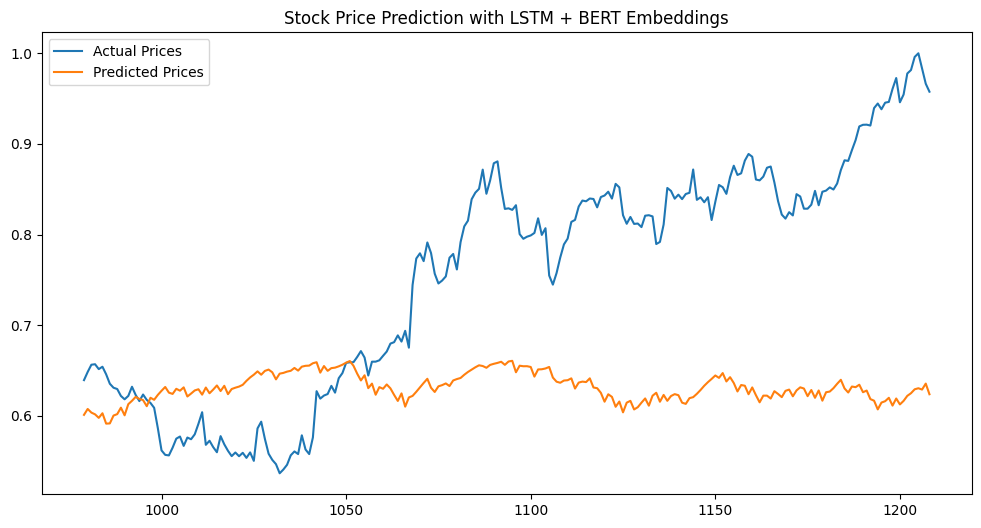

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index[-len(predictions):], y_test_original, label='Actual Prices')  # Use corrected y_test
plt.plot(df.index[-len(predictions):], predictions, label='Predicted Prices')
plt.legend()
plt.title("Stock Price Prediction with LSTM + BERT Embeddings")
plt.show()